<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

## Um pêndulo esquematizado

In [18]:
import numpy as np

ell = 0.8
theta0 = np.pi/6
r = 0.75
s = 0.4

u = ell*np.sin(theta0)
v = -ell*np.cos(theta0)

ttheta = np.linspace(0, theta0, 10)
xtheta = 0.3*ell*np.sin(ttheta)
ytheta = -0.3*ell*np.cos(ttheta)

t = np.linspace(-np.pi/4, np.pi/4, 60)
x = ell*np.sin(t)
y = -ell*np.cos(t)

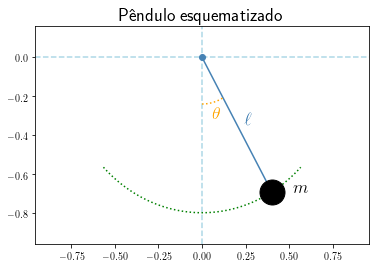

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.axhline(0, color='lightblue', linestyle='--')
plt.axvline(0, color='lightblue', linestyle='--')
plt.rc('text', usetex=True)
plt.plot([0,u], [0, v], marker = 'o', color='steelblue')
plt.plot(xtheta, ytheta, color='orange', linestyle=':')
plt.plot(x, y, color='green', linestyle=':')
plt.plot(u, v, color='black', marker = 'o', markersize='25')
plt.xlim(-1.2*ell, 1.2*ell) 
plt.ylim(-1.2*ell, 0.2*ell)
plt.annotate(r'$\ell$', xy=(0.6*u, 0.5*v), fontsize=18, color='steelblue')
plt.annotate(r'$m$', xy=(1.3*u, v), fontsize=18)
plt.annotate(r'$\theta$', xy=(0.4*ell*np.sin(theta0/3), -0.4*ell*np.cos(theta0/3)), 
             fontsize=18, color='orange')
plt.title(r'Pêndulo esquematizado', fontsize=18)
plt.savefig('pendulo_esquematizado.png', dpi=150)
plt.show()

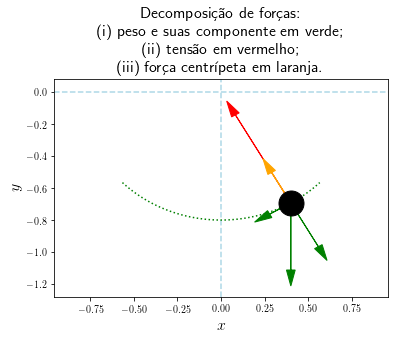

In [50]:
import matplotlib.pyplot as plt

plt.axhline(0, color='lightblue', linestyle='--')
plt.axvline(0, color='lightblue', linestyle='--')

plt.rc('text', usetex=True)

plt.plot(x, y, color='green', linestyle=':')

plt.arrow(u, v, 0, r*v, head_width=0.05, length_includes_head=True, 
          head_length=0.1, facecolor='green', edgecolor='green')
plt.arrow(u, v, r*ell*np.sin(theta0)*v, -r*ell*np.sin(theta0)*u, head_width=0.05,
          length_includes_head=True, head_length=0.1, facecolor='green', edgecolor='green')
plt.arrow(u, v, r*ell*np.cos(theta0)*u, r*ell*np.cos(theta0)*v, length_includes_head=True,
          head_width=0.05, head_length=0.1, facecolor='green', edgecolor='green')

plt.arrow(u, v, -(r*ell*np.cos(theta0)+s)*u, -(r*ell*np.cos(theta0)+s)*v, length_includes_head=True, 
          head_width=0.05, head_length=0.1, 
          facecolor='red', edgecolor='red')

plt.arrow(u, v, -s*u, -s*v, length_includes_head=True,
          head_width=0.05, head_length=0.1, facecolor='orange', edgecolor='orange')

plt.plot(u, v, color='black', marker = 'o', markersize='25')

plt.xlim(-1.2*ell, 1.2*ell) 
plt.ylim(-1.6*ell, 0.1*ell)

plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.title('Decomposição de forças:\n(i) peso e suas componente em verde;\n(ii) tensão em vermelho;\n(iii) força centrípeta em laranja.', fontsize=16)

plt.savefig('pendulo_forcas.png', bbox_inches='tight', pad_inches=0.1, dpi=150)
plt.show()

# Gráfico da solução do problema linear

In [97]:
import numpy as np

ell, g = 0.9, 9.8
k = np.sqrt(g/ell)

theta0, omega0 = np.pi/6, -3
a = np.sqrt(theta0**2 + omega0**2*ell/g)
b = np.arccos(theta0/a)

t = np.linspace(-4,4,100) 
theta = a*np.cos(b + k*t)
T = 2*np.pi/k

t1 = 1.15
t2 = t1 + T
r = (b+k*t1) - np.pi*np.floor((b+k*t1)/np.pi)
if r <= np.pi/2:
    t3 = t1 + (np.pi - 2*r)/k
    t3 = t1 + (2*np.pi - 2*r)/k
else:
    t3 = t1 + (3*np.pi - 2*r)/k
    t3 = t1 + (2*np.pi - 2*r)/k

t3 = t1 + 2*(np.pi - r)/k    
    
theta1 = a*np.cos(b + k*t1)
theta0 = a*np.cos(b)
theta3 = a*np.cos(b + k*t3)

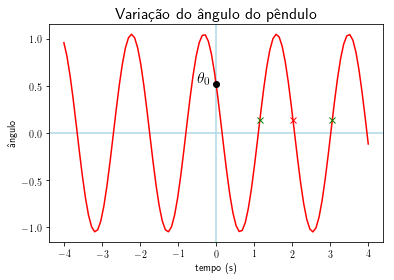

In [98]:
import matplotlib.pyplot as plt

plt.figure()
plt.axhline(0, color='lightblue'), plt.axvline(0, color='lightblue')
plt.rc('text', usetex=True)
plt.annotate(r'$\theta_0$', xy=(-0.5, a*np.cos(b)), fontsize=16)
plt.plot(t,theta, color='red'), plt.xlabel('tempo (s)'), plt.ylabel('ângulo')
plt.plot(t1, theta1, 'x', color='green')
plt.plot(t2, theta1, 'x', color='green')
plt.plot(t3, theta3, 'x', color='red')
plt.plot(0, theta0, 'o', color="black")
plt.title(r'Variação do ângulo do pêndulo', fontsize=16)
plt.savefig('solucao_aprox_linear.png', dpi=150)
plt.show()